In this notebook I will look for an answer to question whether the season (month) has noticeable effect on rent prices in Seattle.

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
# For the need of our analysis we need to download the 'calendar.csv' data only.
df_calendar = pd.read_csv('archive/calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [130]:
# lets look at datatypes used in this table
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [131]:
# We see that date datatype is object (and we need it to be the datetime) and the price is object since it has
# the currency sign in front of the amount
# let's convert the date to datetime datatype.
df_calendar['date'] = pd.to_datetime(df['date'].str.strip(), format='%Y-%m-%d')

In [132]:
# Let's check the period which is covered by the calendar (we need just 1 full year)
df_calendar.date.describe()

/var/folders/2z/0v2b22ds6vsd_n4drt7f17bh0000gn/T/ipykernel_93160/1163566136.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_calendar.date.describe()


count                 1393570
unique                    365
top       2016-01-04 00:00:00
freq                     3818
first     2016-01-04 00:00:00
last      2017-01-02 00:00:00
Name: date, dtype: object

In [133]:
# As we see above there are some entries from 2017. So let's limit our data to 2016.
df_calendar = df_calendar[df_calendar.date.le('2016-12-31')]

In [134]:
# Also in the datatypes info we noticed that prices have datatype 'object'. For the purposes of our analysis
# we need to convert them to "float". So we need to remove $ signs and thousands separators ','

df_calendar['price'] = df_calendar['price'].replace('[\$,]', '', regex=True).astype(float)

In [135]:
# Then let's group the columns 'date' and 'price' by months using average for prices
df_calendar = df_calendar[['date', 'price']]
df_calendar = df_calendar.set_index('date') 

In [136]:
grouper = df_calendar.groupby(pd.Grouper(freq="M"))

In [137]:
# It should be noted that mean function here doesn't take into account NA records which is completely fine.
data = grouper.mean()

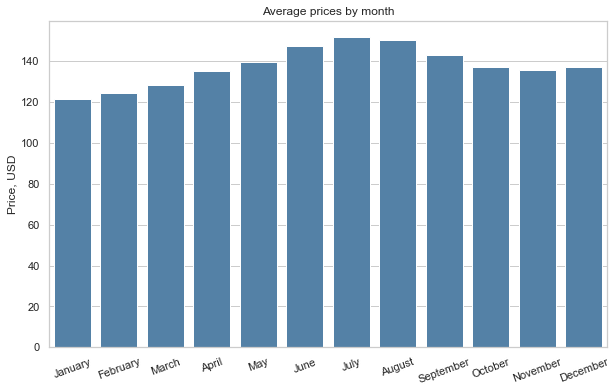

In [138]:
# Now we can plot our bar chart that shows the average price fluctuation by month.
plt.figure(figsize=[10, 6]);
sns.set(style="whitegrid");
sns.barplot(data=data, x=data.index.month_name(), y='price', color='steelblue');
plt.xticks(rotation=20);
plt.ylabel('Price, USD');
plt.xlabel('');
plt.title('Average prices by month');